In [5]:
%matplotlib notebook
import sys
import re
import os
import json
import math
import numpy as np
import matplotlib
from matplotlib import pyplot, cm
from matplotlib.colors import colorConverter
myHexColors = ["#30A2DA", "#FC4F30", "#E5AE38", "#6D904F", "#9757DB", "#188487", "#FF7F00", "#9A2C66", "#626DDA", "#8B8B8B"]
myColorCycle = [colorConverter.to_rgb(i) for i in myHexColors]
from freud import parallel
parallel.setNumThreads(4)
from collections import namedtuple
from scipy.ndimage.filters import gaussian_filter
import cubehelix

matplotlib.rcParams.update({'font.sans-serif': 'Helvetica'})
matplotlib.rcParams.update({'font.family': 'sans-serif'})
matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams.update({'axes.labelsize': 24})
matplotlib.rcParams.update({'xtick.labelsize': 18})
matplotlib.rcParams.update({'ytick.labelsize': 18})
matplotlib.rcParams.update({'savefig.pad_inches': 0.025})

# Radial Distribution Function (RDF)

The RDF returns the probability of finding a particle centered at distance \\(r\\) from another particle in the system, relative to the ideal gas probability. The RDF is a relatively straightforward quantity to compute in simulations, and can be used to derive relevant thermodynamic quantities (those derivations will not be described or explained here). The basic algorithm is described below:

~~~
for each particle i:
    for each particle j:
        r_ij = position[j] - position[i]
        bin_ij = convert_to_bin(r_ij)
        rdf_array[bin_ij]++
~~~

Freud uses cell lists and parallelism to optimize this algorithm. An example for computing and viewing is shown below

<IPython.core.display.Javascript object>


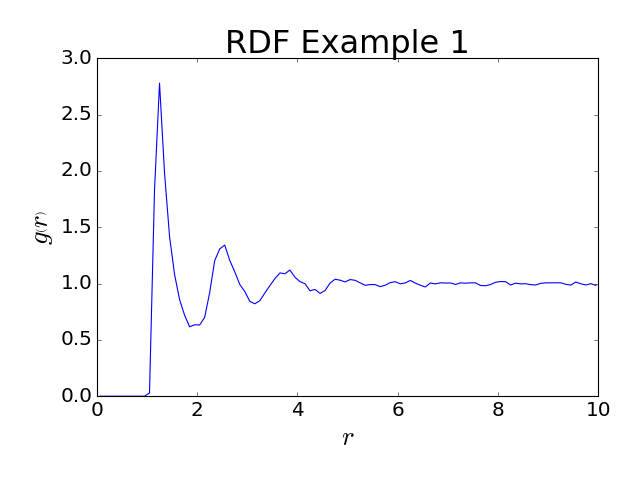

/Users/harperic/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [8]:
# import the freud object
# the rdf module is contained in the density module
from freud import box, density

# create the rdf object
rdf = density.RDF(rmax=10.0, dr=0.1)

# load the data
data_path = "ex_data"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# compute the rdf for the last frame
# read box, position data
l_box = box_data[-1]
l_pos = pos_data[-1]
# create the freud box object
fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)
# compute
rdf.compute(fbox, l_pos, l_pos)

# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()

pyplot.figure()
pyplot.title("RDF Example 1")
pyplot.plot(r, y)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.tight_layout()
pyplot.show()

<IPython.core.display.Javascript object>


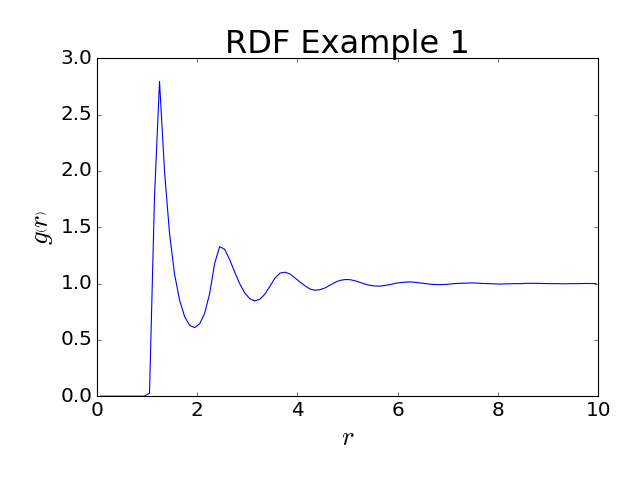

/Users/harperic/miniconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [9]:
rdf.resetRDF()

# load the data
data_path = "ex_data"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# compute the rdf for for all frames except the first (your syntax will vary based on your reader)
for i in range(1, n_frames):
    # read box, position data
    l_box = box_data[i]
    l_pos = pos_data[i]
    # create the freud box object
    fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)
    # accumulate
    rdf.accumulate(fbox, l_pos, l_pos)

# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()

pyplot.figure()
pyplot.title("RDF Example 2")
pyplot.plot(r, y)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.tight_layout()
pyplot.show()